# Mestrado em Informática
## Pós-Graduação em Data Science and Digital Transformation
### (Ambientes de) Programação para Ciência de Dados
### Projeto 1

#### OBJETIVOS
Pretende-se com este projeto utilizar o Python e as suas bibliotecas para explorar e interpretar os
dados que constam nos ficheiros incendios_sc.csv e estados.csv
O ficheiros de dados foram obtido a partir de dados públicos disponíveis em https://queimadas.dgi.inpe.br/. O ficheiro incendios_sc.csv apresenta informação relativa a eventos de incêndios (queimadas) detetados por satélite em municípios brasileiros pertencentes ao bioma Amazónia. O ficheiro estados.csv relaciona os municípios com os respetivos estados federais.
Devem ser dadas às resposta às questões do enunciado com base na análise efetuada com Python e nas bibliotecas adequadas. O trabalho é entregue através do PAE em formato jupyter notebook. Se precisar de entregar mais do que um ficheiro, deve submeter no PAE um único arquivo comprimido. O trabalho é sujeito a discussão em data a combinar,

#### PRIMEIRA PARTE
A primeira parte do trabalho consiste na utilização de Python e suas bibliotecas para explorar e interpretar a informação que consta nos dois ficheiros.
Realize uma análise inicial aos dados constantes em ambos os ficheiros e interprete o seu conteúdo, respondendo a questões como:

In [4]:
import numpy as np
import pandas as pd
import sys
import io
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
def is_colab():
    return "google.colab" in sys.modules

def open_csv_colab():
  uploaded = files.upload()
  if uploaded:
    (filename, content) = next(iter(uploaded))
    print('Uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[filename])))

    return pd.read_csv(io.BytesIO(content))

def open_csv_local():
  app = wx.App(False)
  dialog = wx.FileDialog(
      None,
      "Choose a CSV file",
      wildcard="CSV files (*.csv)|*.csv",
      style=wx.FD_OPEN | wx.FD_FILE_MUST_EXIST
  )

  if dialog.ShowModal() == wx.ID_OK:
      path = dialog.GetPath()
      print("Selected:", path)
      df = pd.read_csv(path)
      dialog.Destroy()
      return df
  else:
      dialog.Destroy()
      print("No file selected.")
      return None

if is_colab():
  from google.colab import files
  open_csv = open_csv_colab
else:
  import wx
  open_csv = open_csv_local

##### 1. incendios_sc.csv


In [6]:
incendios_dt = open_csv()
incendios_dt


** (ipykernel_launcher.py:178786): WARNING **: 19:49:52.295: atk-bridge: get_device_events_reply: unknown signature


Selected: /home/deck/Mestrado/ContainerHomes/ComputacaoCienciaDados/dev/ipp.mi.data-science-programming/src/projecto1/incendios_sv.csv


,DataHora,Satelite,Municipi,RiscoFog
0,2018/01/01 00:04:15,GOES-16,MARCELANDIA,0.00
1,2018/01/01 00:29:09,GOES-13,MAUES,NaN
2,2018/01/01 00:29:09,GOES-13,MAUES,0.03
3,2018/01/01 00:54:55,METOP-B,TAILANDIA,0.00
4,2018/01/01 01:31:29,GOES-13,PARECIS,0.25
...,...,...,...,...
9468634,2019/01/02 04:42:00,NPP-375D,PACARAIMA,1.00
9468635,2019/01/02 04:42:00,NPP-375D,PACARAIMA,1.00
9468636,2019/01/02 04:42:00,NPP-375D,COLNIZA,0.40
9468637,2019/01/03 06:00:00,NPP-375D,NORMANDIA,1.00


1.1 Qual é a dimensão do conjunto de dados?

In [7]:
incendios_dt.shape

(9468639, 4)

1.2 Qual o nome das colunas e que tipo de dados que lhe estão associados?

In [8]:
incendios_dt.dtypes

DataHora     object
Satelite     object
Municipi     object
RiscoFog    float64
dtype: object

1.3. Existem valores NaN? Se sim, em quantidade significativa? Em que colunas?

In [9]:
nan_cols = incendios_dt.isna()
if nan_cols.any(axis=None):
    print("There are NaN cells.")
else:
    print("There are no NaN cells.")

print(nan_cols.sum())

There are NaN cells.
DataHora         0
Satelite         0
Municipi         0
RiscoFog    159123
dtype: int64


1.4 Qual é o intervalo temporal a que o conjunto de dados se reporta?

In [10]:
incendios_dt['DataHora'] = pd.to_datetime(incendios_dt['DataHora'])
max_date = incendios_dt['DataHora'].max()
min_date = incendios_dt['DataHora'].min()
duration = max_date - min_date

print(f"Data de inicio: {min_date}; Data de Fim: {max_date}; intervalo de tempo: {duration};")

Data de inicio: 2018-01-01 00:04:15; Data de Fim: 2022-12-31 18:10:00; intervalo de tempo: 1825 days 18:05:45;


1.5 Analise os dados da coluna “Satelite” para dar resposta às questões:

a) Quais são os satélites dominantes no dataset?

In [11]:
print("Mode:")
print(incendios_dt['Satelite'].mode(),"\n") # Mostra o satélite mais frequente(s), mais que 1 se o numero máximo de ocorrencias for igual.

print("Top 5 satelites:")
print(incendios_dt['Satelite'].value_counts().head(5).index) # Mostra os 5 satélites mais frequentes

Mode:
0    GOES-16
Name: Satelite, dtype: object 

Top 5 satelites:
Index(['GOES-16', 'NOAA-20', 'NPP-375', 'NPP-375D', 'AQUA_M-T'], dtype='object', name='Satelite')


b) Os satélites disponíveis foram sempre os mesmos ao longo dos anos, ou houve
alterações? Se sim, quais

In [12]:
incendios_dt['Ano'] = incendios_dt['DataHora'].dt.year

satelites_por_ano = pd.crosstab(
    incendios_dt['Satelite'],
    incendios_dt['Ano'])

print(mpl.scale.get_scale_names())
# pd.set_option('display.max_rows', None)
satelites_por_ano
# pd.reset_option('display.max_rows')

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


Ano,2018,2019,2020,2021,2022
Satelite,,,,,
AQUA_M-M,6417,12269,12537,9138,15401
AQUA_M-T,68345,89176,103161,75090,115033
GOES-13,312,0,0,0,0
GOES-16,290336,362675,664963,655048,880111
METOP-B,17861,32968,54727,6226,4667
METOP-C,0,75,23092,3064,2319
MSG-03,764,5567,6525,4652,8313
NOAA-15,6453,1688,0,0,0
NOAA-15D,156,32,0,0,0


/tmp/ipykernel_178786/1500315566.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', num_sats)
/tmp/ipykernel_178786/1500315566.py:30: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 2 Axes> than <Figure size 1200x600 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(im, label="Número de utilizações")


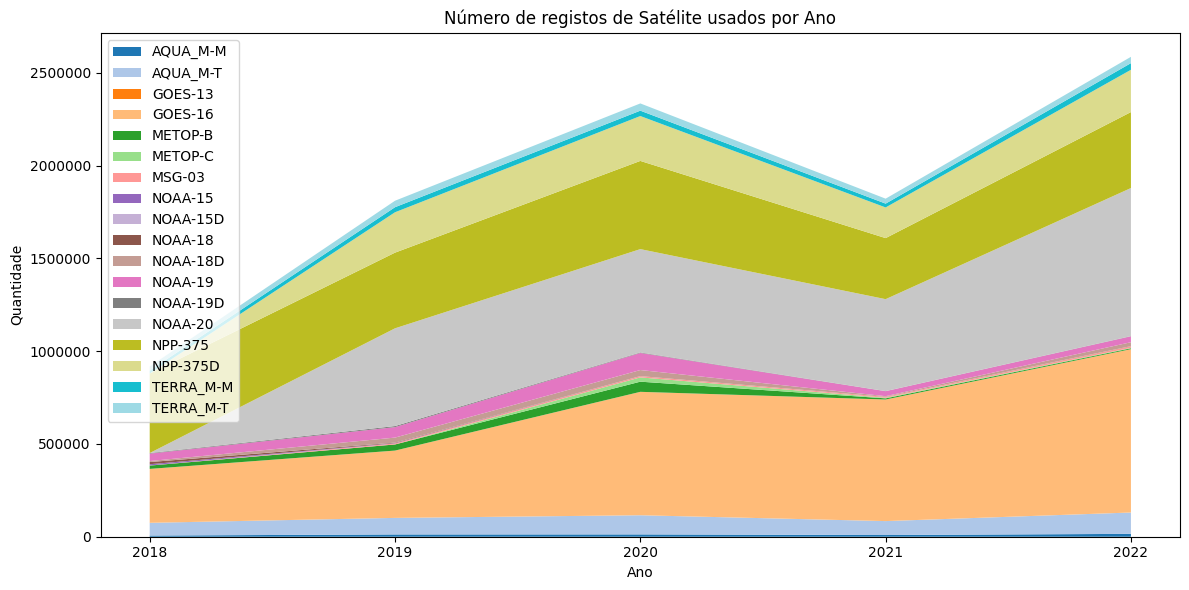

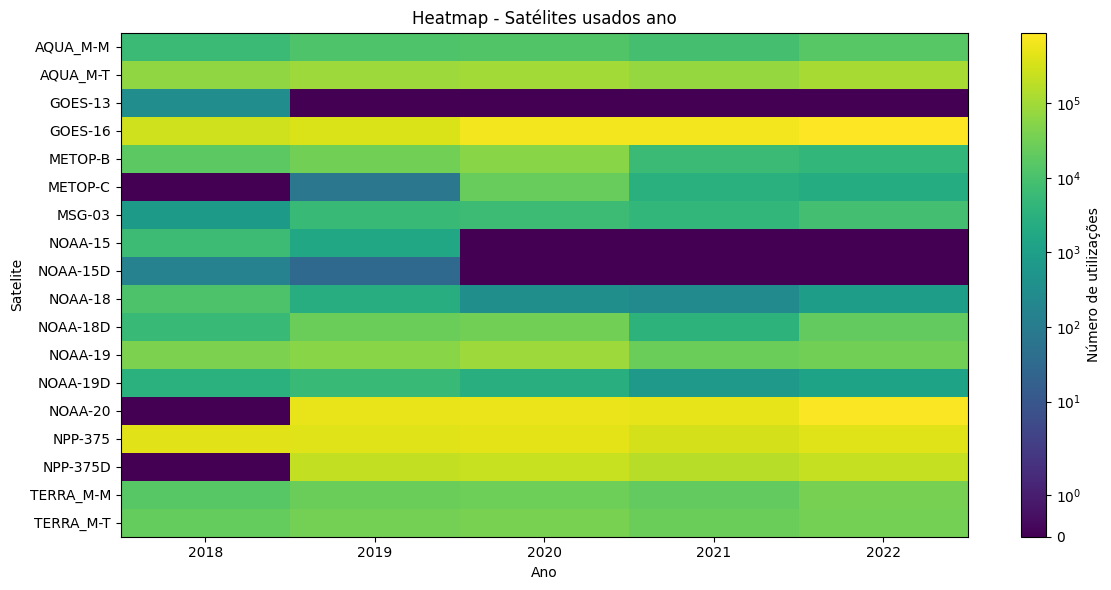

In [14]:
import matplotlib.cm as cm

# StackPlot
fig, ax = plt.subplots(figsize=(12, 6))

# Color palette
num_sats = len(satelites_por_ano.index)
cmap = cm.get_cmap('tab20', num_sats)
colors = [cmap(i) for i in range(num_sats)]

ax.stackplot(
    satelites_por_ano.columns,
    satelites_por_ano.values,
    labels=satelites_por_ano.index,
    colors=colors
)

# Graph Characteristics
ax.set_title("Número de registos de Satélite usados por Ano")
ax.set_xticks(satelites_por_ano.columns.astype(int))
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.legend(loc="upper left")
ax.ticklabel_format(style='plain', axis='y')
fig.tight_layout()

# Heatmap
fig2, ax2 = plt.subplots(figsize=(12, 6))
im = ax2.imshow(satelites_por_ano, aspect='auto', norm='symlog')
fig.colorbar(im, label="Número de utilizações")

# Graph Characteristics
ax2.set_xticks(
    ticks=np.arange(len(satelites_por_ano.columns)),
    labels=satelites_por_ano.columns
)
ax2.set_yticks(
    ticks=np.arange(len(satelites_por_ano.index)),
    labels=satelites_por_ano.index
)
ax2.set_xlabel("Ano")
ax2.set_ylabel("Satelite")
ax2.set_title("Heatmap - Satélites usados ano")
fig2.tight_layout()

# Render graphs
plt.show()

Resposta: O uso dos satélites variou ao longo dos anos:
- Os satélites *TERRA_M-M*, *NPP-375*, *TERRA_M_T*, *NOA-19*, *AQUA_M-M* e *AQUA_M-T*  mantiveram um uso regular sem grandes diferenças ao longo dos anos.
- Houve um crescimento contínuo de uso do *GOES-16*
- *GOES-13* é apenas usado em 2018
- Os *NOAA-15* e *NOAA-15D* deixam de ser usados em 2020.
- *METOP-C*, *NOAA-20* e o *NPP-375* passam a ser usados a partir de 2019
- 